In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
#import dash 

In [5]:
# Load the dataset as a CSV file into a Pandas DataFrame
data_path = '/Users/Elena/Documents/GitHub/steel_strength/metals_data.csv'  # Update this path
data_csv_df = pd.read_csv(data_path)
data_csv_df

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00
308,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09
309,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00
310,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00


In [6]:
type(data_csv_df)

pandas.core.frame.DataFrame

In [7]:
data_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c       312 non-null    float64
 1   mn      312 non-null    float64
 2   si      312 non-null    float64
 3   cr      312 non-null    float64
 4   ni      312 non-null    float64
 5   mo      312 non-null    float64
 6   v       312 non-null    float64
 7   n       312 non-null    float64
 8   nb      312 non-null    float64
 9   co      312 non-null    float64
 10  w       312 non-null    float64
 11  al      312 non-null    float64
 12  ti      312 non-null    float64
dtypes: float64(13)
memory usage: 31.8 KB


In [8]:
# Load the dataset
data_path = '/Users/Elena/Documents/GitHub/steel_strength/metals_data.xlsx'  # Update this path
data_xlsx_df = pd.read_excel(data_path)
print(f"data_xlsx_df: {data_xlsx_df.shape} rows and columns")
print(f"data_xlsx_df: {data_xlsx_df.columns} column names")
print(f"data_xlsx_df: {data_xlsx_df.index} row indices")
print()
print(f"data_xlsx_df: {data_xlsx_df.dtypes} data types")
print()
print(f"data_xlsx_df: {data_xlsx_df.info()} dataframe profile information")
print()
print(f"data_xlsx_df: {data_xlsx_df.describe()} descriptive statistics for the dataframe (for numeric columns)") 
print()
print(f"data_xlsx_df: {data_xlsx_df.head()} data types \n\n")

data_xlsx_df

data_xlsx_df: (312, 13) rows and columns
data_xlsx_df: Index(['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al',
       'ti'],
      dtype='object') column names
data_xlsx_df: RangeIndex(start=0, stop=312, step=1) row indices

data_xlsx_df: c     float64
mn    float64
si    float64
cr    float64
ni    float64
mo    float64
v     float64
n     float64
nb    float64
co    float64
w     float64
al    float64
ti    float64
dtype: object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c       312 non-null    float64
 1   mn      312 non-null    float64
 2   si      312 non-null    float64
 3   cr      312 non-null    float64
 4   ni      312 non-null    float64
 5   mo      312 non-null    float64
 6   v       312 non-null    float64
 7   n       312 non-null    float64
 8   nb      312 non-null    float64
 9   co      312 non-n

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00
308,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09
309,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00
310,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00


In [9]:
# Sort by column: 'co' (descending)
data = data_xlsx_df.sort_values(['co'], ascending=[False])

In [10]:
data

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
5,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
85,0.35,0.01,0.01,9.00,1.50,2.00,0.30,0.00,0.01,18.00,0.00,0.03,0.02
25,0.20,0.01,0.51,12.51,0.95,1.97,0.01,0.00,0.08,17.06,0.00,0.03,0.00
15,0.20,0.01,0.01,14.13,0.92,1.99,0.01,0.00,0.08,17.00,0.00,0.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.01,0.05,0.09,7.65,12.20,3.05,0.01,0.00,0.01,0.01,0.00,0.46,0.20
226,0.01,0.12,0.06,10.30,10.20,2.05,0.01,0.00,0.01,0.01,0.00,0.31,0.21
225,0.01,0.03,0.03,10.20,10.50,2.20,0.01,0.00,0.01,0.01,0.00,0.23,0.24
224,0.01,0.11,0.18,10.20,10.30,2.05,0.01,0.00,0.01,0.01,0.00,0.27,0.22


In [11]:
# Normalize the dataset
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized_df = pd.DataFrame(data_normalized, columns=data.columns)

In [12]:

# Split the dataset into features and target variable
# Assuming the target variable is the last column
X = data_normalized_df.iloc[:, :-1]  # Features
y = data_normalized_df.iloc[:, -1]   # Target


In [13]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
X_train, X_test, y_train, y_test

(            c        mn        si        cr        ni        mo         v  \
 111  0.000000  0.013378  0.008439  0.000000  0.857075  0.370984  0.115741   
 208  0.023256  0.016722  0.008439  0.445397  0.485469  0.329534  0.002315   
 145  0.023256  0.000000  0.000000  0.626072  0.379228  0.516062  0.002315   
 203  0.023256  0.023411  0.008439  0.265294  0.576465  0.322280  0.002315   
 78   0.279070  0.000000  0.000000  0.829617  0.000000  0.525389  0.099537   
 ..        ...       ...       ...       ...       ...       ...       ...   
 188  0.000000  0.000000  0.000000  0.817038  0.394950  0.267358  0.002315   
 71   0.511628  0.000000  0.000000  0.177244  0.534064  0.121244  0.002315   
 106  0.023256  0.013378  0.008439  0.000000  0.818961  0.407254  0.002315   
 270  0.023256  0.020067  0.021097  0.645512  0.490233  0.210363  0.002315   
 102  0.558140  0.000000  0.000000  0.514008  0.132920  0.132642  0.067130   
 
        n     nb        co    w        al  
 111  0.0  0.004  

In [15]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

Mean Squared Error: 0.011563619707936503
R² Score: 0.7561150278352762


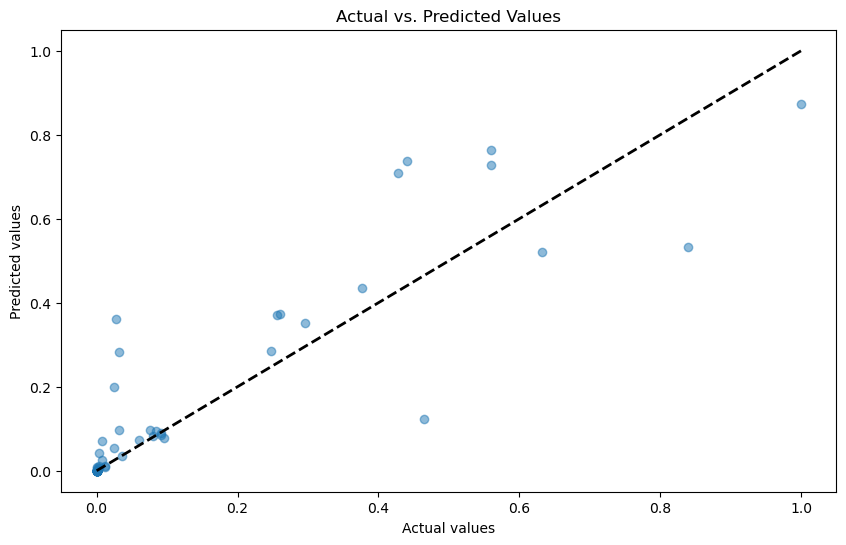

In [16]:

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()



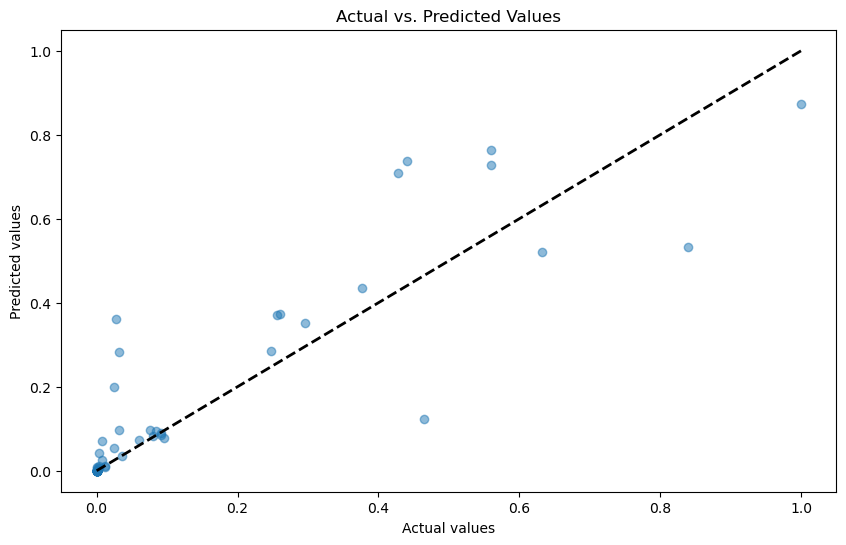

In [17]:

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()



Here is how you can create an interactive scatter plot using Plotly in Python for your data:



In [18]:
import plotly.graph_objects as go

# Create a trace for the scatter plot
trace1 = go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Data',
    marker=dict(color='rgba(152, 0, 0, .8)'),
)

# Create a trace for the line
trace2 = go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Fit',
    line=dict(color='black', dash='dash')
)

data = [trace1, trace2]

layout = go.Layout(
    title='Actual vs. Predicted Values',
    xaxis=dict(title='Actual values'),
    yaxis=dict(title='Predicted values'),
)

fig = go.Figure(data=data, layout=layout)

fig.show()



This code creates an interactive scatter plot of `y_test` vs `y_pred` and a line from the minimum to the maximum of `y_test`. The plot is displayed in the Jupyter notebook and is interactive, meaning you can zoom, pan, hover over data points to see their values, and so on.